In [2]:
!pip install -q tensorflow

In [31]:
#Bibliotecas

import pandas as pd
from sklearn.model_selection import train_test_split #Faz uma divisão aleatória dos dados 
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.layers import Dense, Input

In [32]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df.shape #(Qt linhas , Qt colunas)

(891, 12)

In [34]:
df.info() #informa o tipo de dado de cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
df.describe() 

#count: conta o numero de valores não nulos preenchidos na coluna. Bom para verificar se tem dados faltando

#mean: Média aritmética .

#std : Desvio padrão. Espalhamento dos dados em torno da média.

# min: menor valor encontrado na coluna

#max : maior valor encontrado na coluna

#25% : primeiro quartil. 25% dos dados são menores ou iguais a isso
#50% : Mediana. Metade dos dados abaixo, metade acima.
#75% : 75% dos seus dados são menores ou iguais a esse valor


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
df.isnull().sum() 

#ver quantos dados faltam em determinadas colunas 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
print(df['Embarked'].unique())

['S' 'C' 'Q' nan]


In [38]:
#Como Embarked tem dados não numericos. vamos preencher os dados usando sua moda.Essa é a forma mais precisa

moda_Embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(moda_Embarked)

In [39]:
#Fazendo o debug para ver se o preenchimento funcionou Embarked
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [40]:
#Na idade a forma mais segura de preencher esses 177 dados faltantes é usar a mediana.

mediana_idade = df['Age'].median()
df['Age'] = df['Age'].fillna(mediana_idade)

In [41]:
#fazendo debug para ver o preenchimento de Age funcionou
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [42]:
#Agora vamos para Cabin. Tem 687 dados faltando.
#Vamos ver como são esses dados:
print(df['Cabin'].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [43]:
# 1. Só cria 'Has_Cabin' se a coluna 'Cabin' ainda existir
if 'Cabin' in df.columns:
    df['Has_Cabin'] = df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

# 2. Só cria 'FamilySize' se as originais existirem
if 'SibSp' in df.columns and 'Parch' in df.columns:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 3. Só cria 'IsAlone' se 'FamilySize' existir
if 'FamilySize' in df.columns:
    df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

# 4. Remove apenas as colunas que REALMENTE estão lá
colunas_para_remover = ['PassengerId','Name','Ticket' ,'Cabin','SibSp','Parch']
colunas_presentes = [c for c in colunas_para_remover if c in df.columns]

if colunas_presentes:
    df.drop(colunas_presentes, axis=1, inplace=True)
    print(f"Colunas removidas: {colunas_presentes}")

# 5. Converter categorias (Sex e Embarked)
# O pandas é inteligente: se já converteu, ele não fará nada ou manterá como está
colunas_cat = [c for c in ['Sex', 'Embarked'] if c in df.columns]
if colunas_cat:
    df = pd.get_dummies(df, columns=colunas_cat, drop_first=True)

print("Processamento concluído com sucesso!")



Colunas removidas: ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
Processamento concluído com sucesso!


In [44]:
#Vamos ver se funcionou

df.isnull().sum()

Survived      0
Pclass        0
Age           0
Fare          0
Has_Cabin     0
FamilySize    0
IsAlone       0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [45]:
#Dados prontos para uso ! 

In [46]:
# Separando os dados:
X= df.drop('Survived',axis= 1)#Todas as colunas (Features) , menos "Survived"(Queremos "descobrir")
Y = df['Survived'] #Target 

#Dividindo os dados entre treino e teste

X_train , X_test , Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42) 

#Trenamos com 80% dos dados e deixamos 20% para que o modelo teste se aprendeu.

In [47]:
#Vamos padronizar os dados usando a média e desvio padrão de cada elemento da coluna.
scaler = StandardScaler()

#Capturando a média e desvio padrão de cada elemento que está sendo treinadoX_train
X_train_scaled = scaler.fit_transform(X_train)

#Apenas transforma dados de Teste, usando os valores aprendidos no Treino 
X_test_scaled = scaler.transform(X_test)

#Debug:
print("padronização conluída.")


padronização conluída.


In [57]:
# Define o número de features de entrada
input_dim = X_train_scaled.shape[1] 

# ==============================================================================
# CONSTRUÇÃO E COMPILAÇÃO DA REDE NEURAL 
# ==============================================================================

model = Sequential([
    #Camada de entrada explícita
    Input(shape=(input_dim,)),
    
    # Primeira Camada Oculta
    Dense(units=16, activation='relu'), 
    
    # Camada Oculta
    Dense(units=8, activation='relu'), 
    
    # Camada de Saída
    Dense(units=1, activation='sigmoid') 
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

print("--- Arquitetura do Modelo ---")
model.summary()

--- Arquitetura do Modelo ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305 (1.19 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Inicia o treinamento
history = model.fit(
    X_train_scaled,  # Dados de entrada (Features) padronizados
    Y_train,         # Dados de saída (Target)
    epochs=100,      # Quantas vezes o modelo verá o conjunto de treino
    batch_size=32,   # Quantos exemplos o modelo processa por vez antes de atualizar os pesos
    verbose=0        # Roda o treinamento sem mostrar o log de cada época
)

print("Treinamento concluído. O modelo aprendeu com 100 épocas.")

Treinamento concluído. O modelo aprendeu com 100 épocas.


In [50]:
# 1. Avaliação Objetiva
loss, accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)

# 2. Geração de Previsões (para conferência manual)
# O modelo retorna probabilidades, vamos transformar em 0 ou 1
predictions = (model.predict(X_test_scaled) > 0.5).astype("int32")

print("====================================================")
print(f"📊 RESULTADO FINAL DO MODELO")
print(f"Acurácia no Teste: {accuracy * 100:.2f}%")
print(f"Perda (Loss): {loss:.4f}")
print("====================================================")

# Exibe as 5 primeiras previsões vs Realidade
print("\nExemplo de Previsões (Primeiros 5 passageiros do teste):")
for i in range(5):
    real = "Sobreviveu" if Y_test.values[i] == 1 else "Morreu"
    pred = "Sobreviveu" if predictions[i] == 1 else "Morreu"
    print(f"Passageiro {i+1}: Real: {real} | Modelo: {pred}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
📊 RESULTADO FINAL DO MODELO
Acurácia no Teste: 80.45%
Perda (Loss): 0.4473

Exemplo de Previsões (Primeiros 5 passageiros do teste):
Passageiro 1: Real: Sobreviveu | Modelo: Morreu
Passageiro 2: Real: Morreu | Modelo: Morreu
Passageiro 3: Real: Morreu | Modelo: Morreu
Passageiro 4: Real: Sobreviveu | Modelo: Sobreviveu
Passageiro 5: Real: Sobreviveu | Modelo: Sobreviveu


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
--- Relatório de Classificação ---
              precision    recall  f1-score   support

      Morreu       0.81      0.87      0.84       105
  Sobreviveu       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



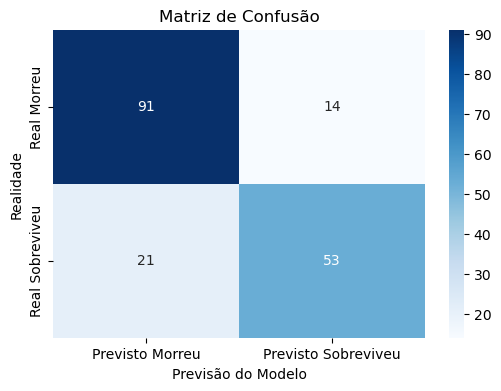

In [51]:
# 1. Obter as previsões do modelo (transformando probabilidade em 0 ou 1)
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# 2. Gerar o Relatório de Classificação
print("--- Relatório de Classificação ---")
print(classification_report(Y_test, y_pred, target_names=['Morreu', 'Sobreviveu']))

# 3. Gerar a Matriz de Confusão Visual
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Previsto Morreu', 'Previsto Sobreviveu'],
            yticklabels=['Real Morreu', 'Real Sobreviveu'])
plt.ylabel('Realidade')
plt.xlabel('Previsão do Modelo')
plt.title('Matriz de Confusão')
plt.show()

In [52]:
# Treinando Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, Y_train) 

print("✅ Treinamento de Random Forest concluído!")

✅ Treinamento de Random Forest concluído!


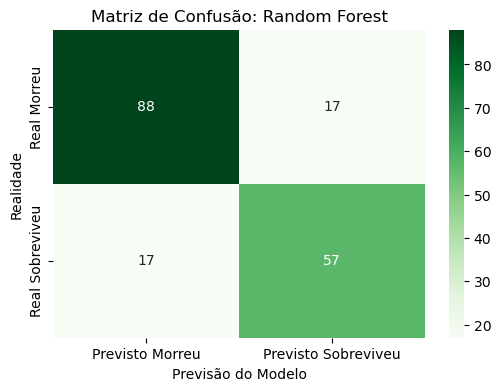

In [53]:
#Analise de erros do Random forest

plt.figure(figsize=(6, 4)) # Define um tamanho menor e centralizado

# Gera a matriz de confusão para o Random Forest
sns.heatmap(confusion_matrix(Y_test, rf_pred), 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=['Previsto Morreu', 'Previsto Sobreviveu'],
            yticklabels=['Real Morreu', 'Real Sobreviveu'])

plt.title('Matriz de Confusão: Random Forest')
plt.ylabel('Realidade')
plt.xlabel('Previsão do Modelo')

plt.show()

In [54]:
# Treinando Suport Vector Machine (SVM)
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_scaled, Y_train)
print("✅ Treinamento de SVM concluído!")

✅ Treinamento de SVM concluído!


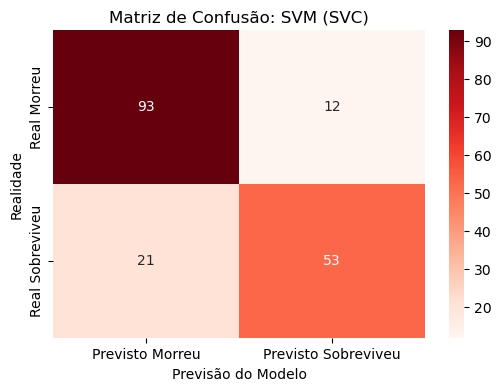

In [55]:
#Analise de erros SVM(SVC)

plt.figure(figsize=(6, 4)) # Mantém a consistência de tamanho

# Gera a matriz de confusão para o SVM
sns.heatmap(confusion_matrix(Y_test, svm_pred), 
            annot=True, 
            fmt='d', 
            cmap='Reds', # Cor azul para identificar o SVM
            xticklabels=['Previsto Morreu', 'Previsto Sobreviveu'],
            yticklabels=['Real Morreu', 'Real Sobreviveu'])

plt.title('Matriz de Confusão: SVM (SVC)')
plt.ylabel('Realidade')
plt.xlabel('Previsão do Modelo')

plt.show()

In [56]:
# Placar dos modelos
rf_pred = rf_model.predict(X_test_scaled)
svm_pred = svm_model.predict(X_test_scaled)

acc_rf = accuracy_score(Y_test, rf_pred)
acc_svm = accuracy_score(Y_test, svm_pred)

print("PLACAR")
print("-" * 30)
print(f"🧠 Rede Neural (Keras): {accuracy:.4f}")
print(f"🌲 Random Forest:       {acc_rf:.4f}")
print(f"🎯 SVM:                 {acc_svm:.4f}")
print("-" * 30)

PLACAR
------------------------------
🧠 Rede Neural (Keras): 0.8045
🌲 Random Forest:       0.8101
🎯 SVM:                 0.8156
------------------------------


 Conclusão: Análise Crítica da comparação de Modelos
     Visão Geral dos Concorrentes:
     
Rede Neural (Keras/TensorFlow): Modelo de Deep Learning que utiliza camadas densas para capturar padrões não lineares complexos.
Random Forest: Um conjunto (ensemble) de árvores de decisão que utiliza a estratégia de "sabedoria das massas" para evitar overfitting.
SVM (Support Vector Classification): Um algoritmo geométrico que busca encontrar o hiperplano de separação que maximize a margem entre as classes.

📊 Por que o SVM venceu (0.8156)?
O sucesso do SVM sobre a Rede Neural e a Random Forest neste dataset pode ser atribuído à natureza dos dados do Titanic:

Dimensão do Dataset: Redes Neurais são "famintas por dados". Com cerca de 891 registros, modelos clássicos como o SVM tendem a ser mais estáveis e menos propensos a memorizar ruídos (overfitting).

Espaço de Características: O fato de o SVM ter vencido indica que, após a nossa Padronização (StandardScaler), os sobreviventes e não sobreviventes ficaram bem separados geometricamente no hiperespaço de características.

Eficiência x Complexidade: O empate entre a Rede Neural e a Random Forest sugere que ambos atingiram o limite de informação extraível das colunas atuais. A Rede Neural não conseguiu "inventar" novos padrões além do que as árvores já detectaram.